In [20]:
from music21 import *
ks2 = key.KeySignature(3) # -3 for flats, no flats method use sharps
ks2.sharps
print(ks2.alteredPitches)
print(ks2.accidentalByStep('F'))
print(ks2.accidentalByStep('E') is None)
ks12 = key.KeySignature(12)
print(ks12.accidentalByStep('F'))
ks4 = ks2.transpose('M2')
print(ks4)
print(ks2.getScale('major'))
print(ks2.getScale('minor'))




[<music21.pitch.Pitch F#>, <music21.pitch.Pitch C#>, <music21.pitch.Pitch G#>]
<accidental sharp>
True
<accidental double-sharp>
<music21.key.KeySignature of 5 sharps>
<music21.scale.MajorScale A major>
<music21.scale.MinorScale F# minor>


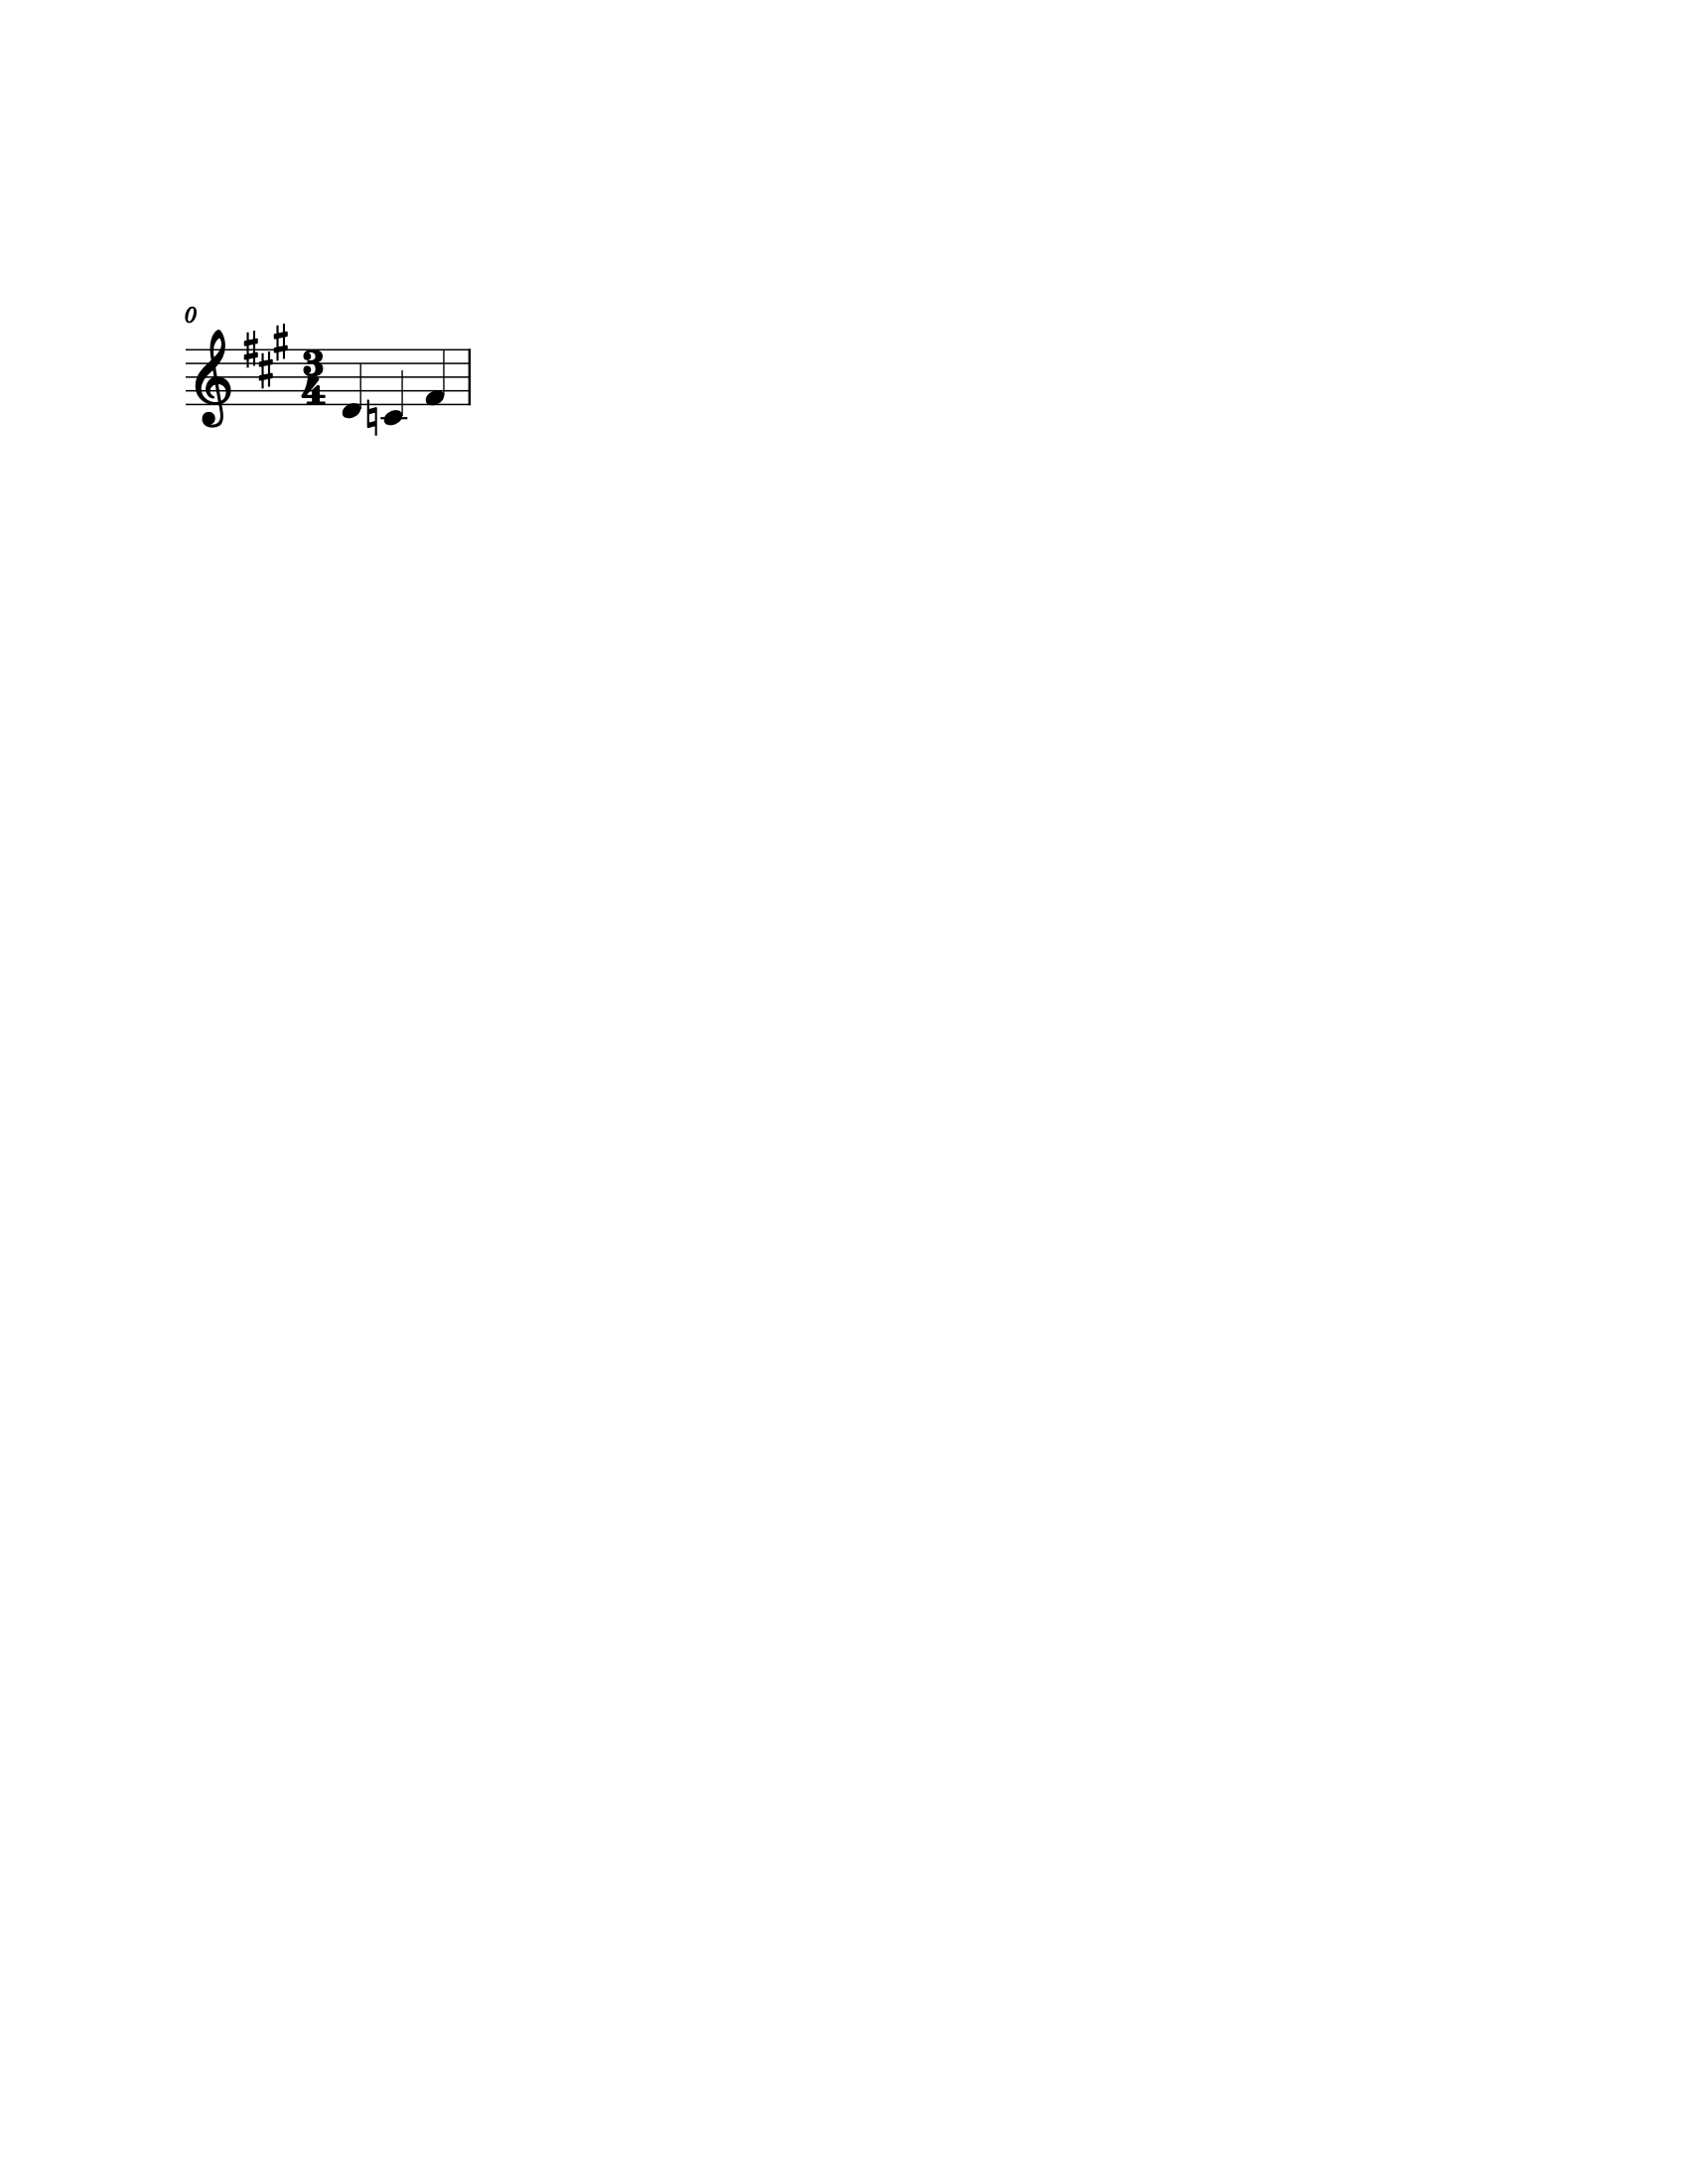

In [21]:
m = stream.Measure()
m.insert(0, meter.TimeSignature('3/4'))
m.insert(0, ks2)
d = note.Note('D')
c = note.Note('C')
fis = note.Note('F#') # German name
m.append([d, c, fis])
m.show()

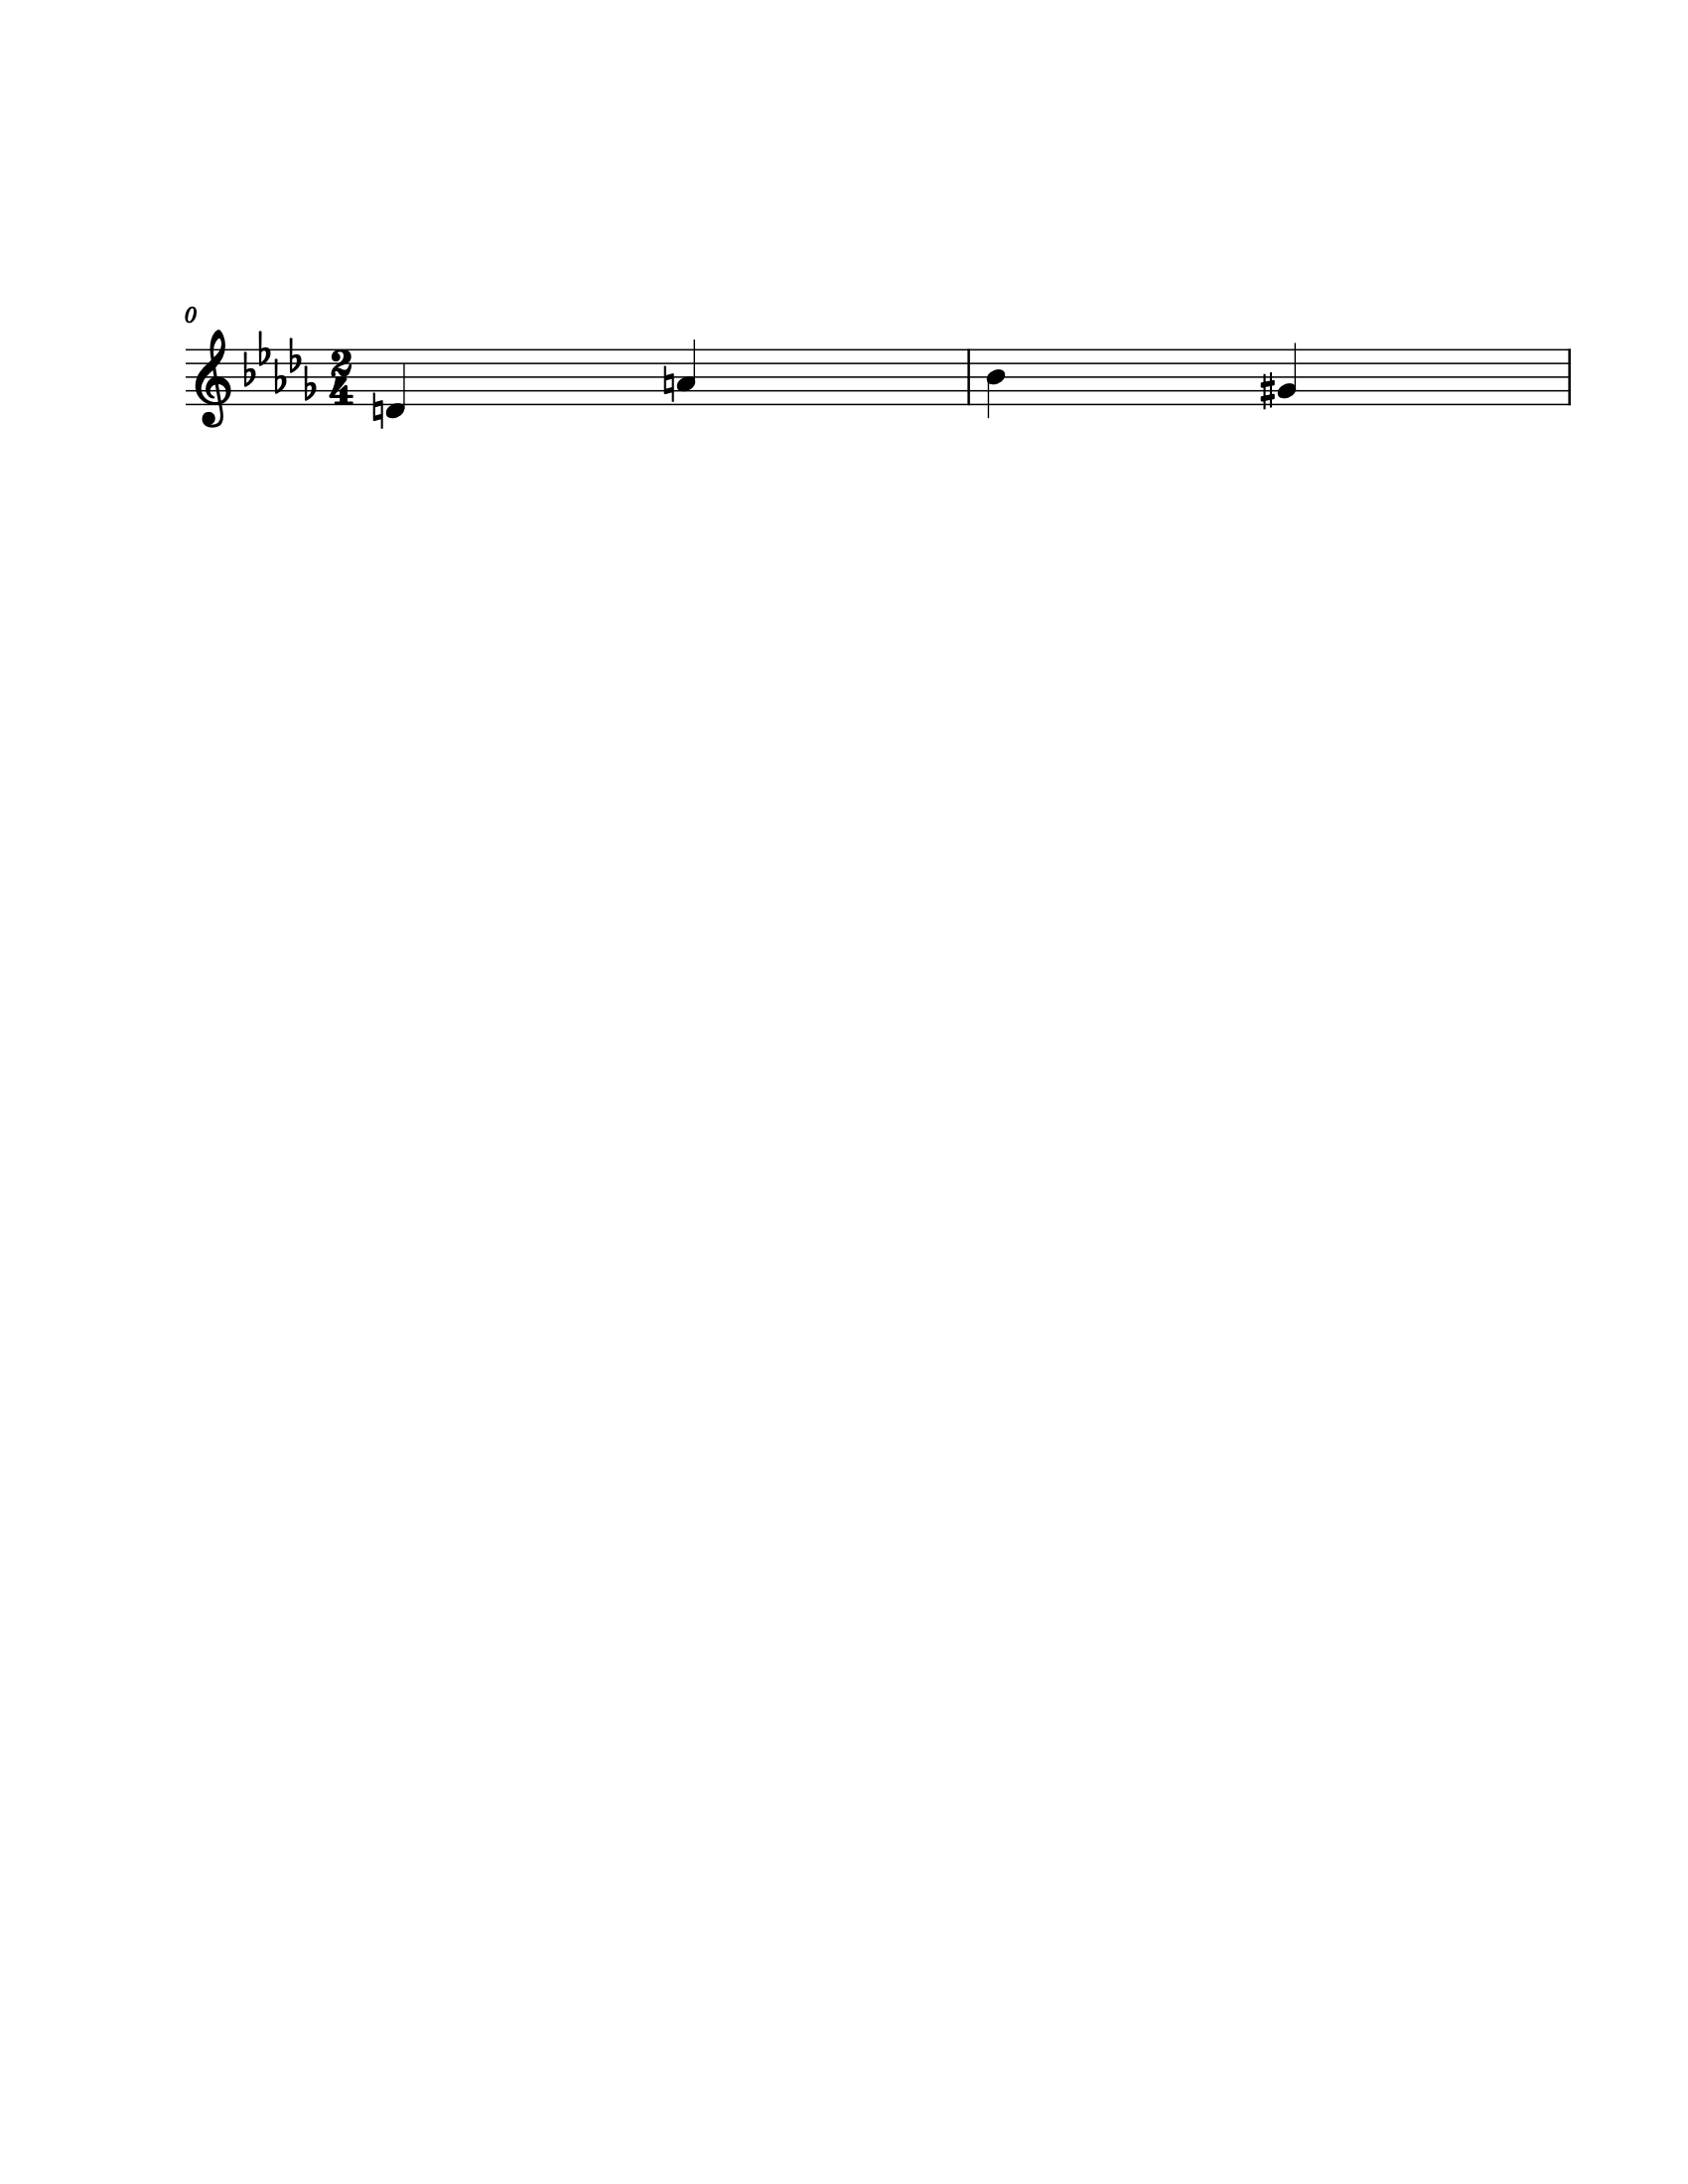

In [22]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
p.show()

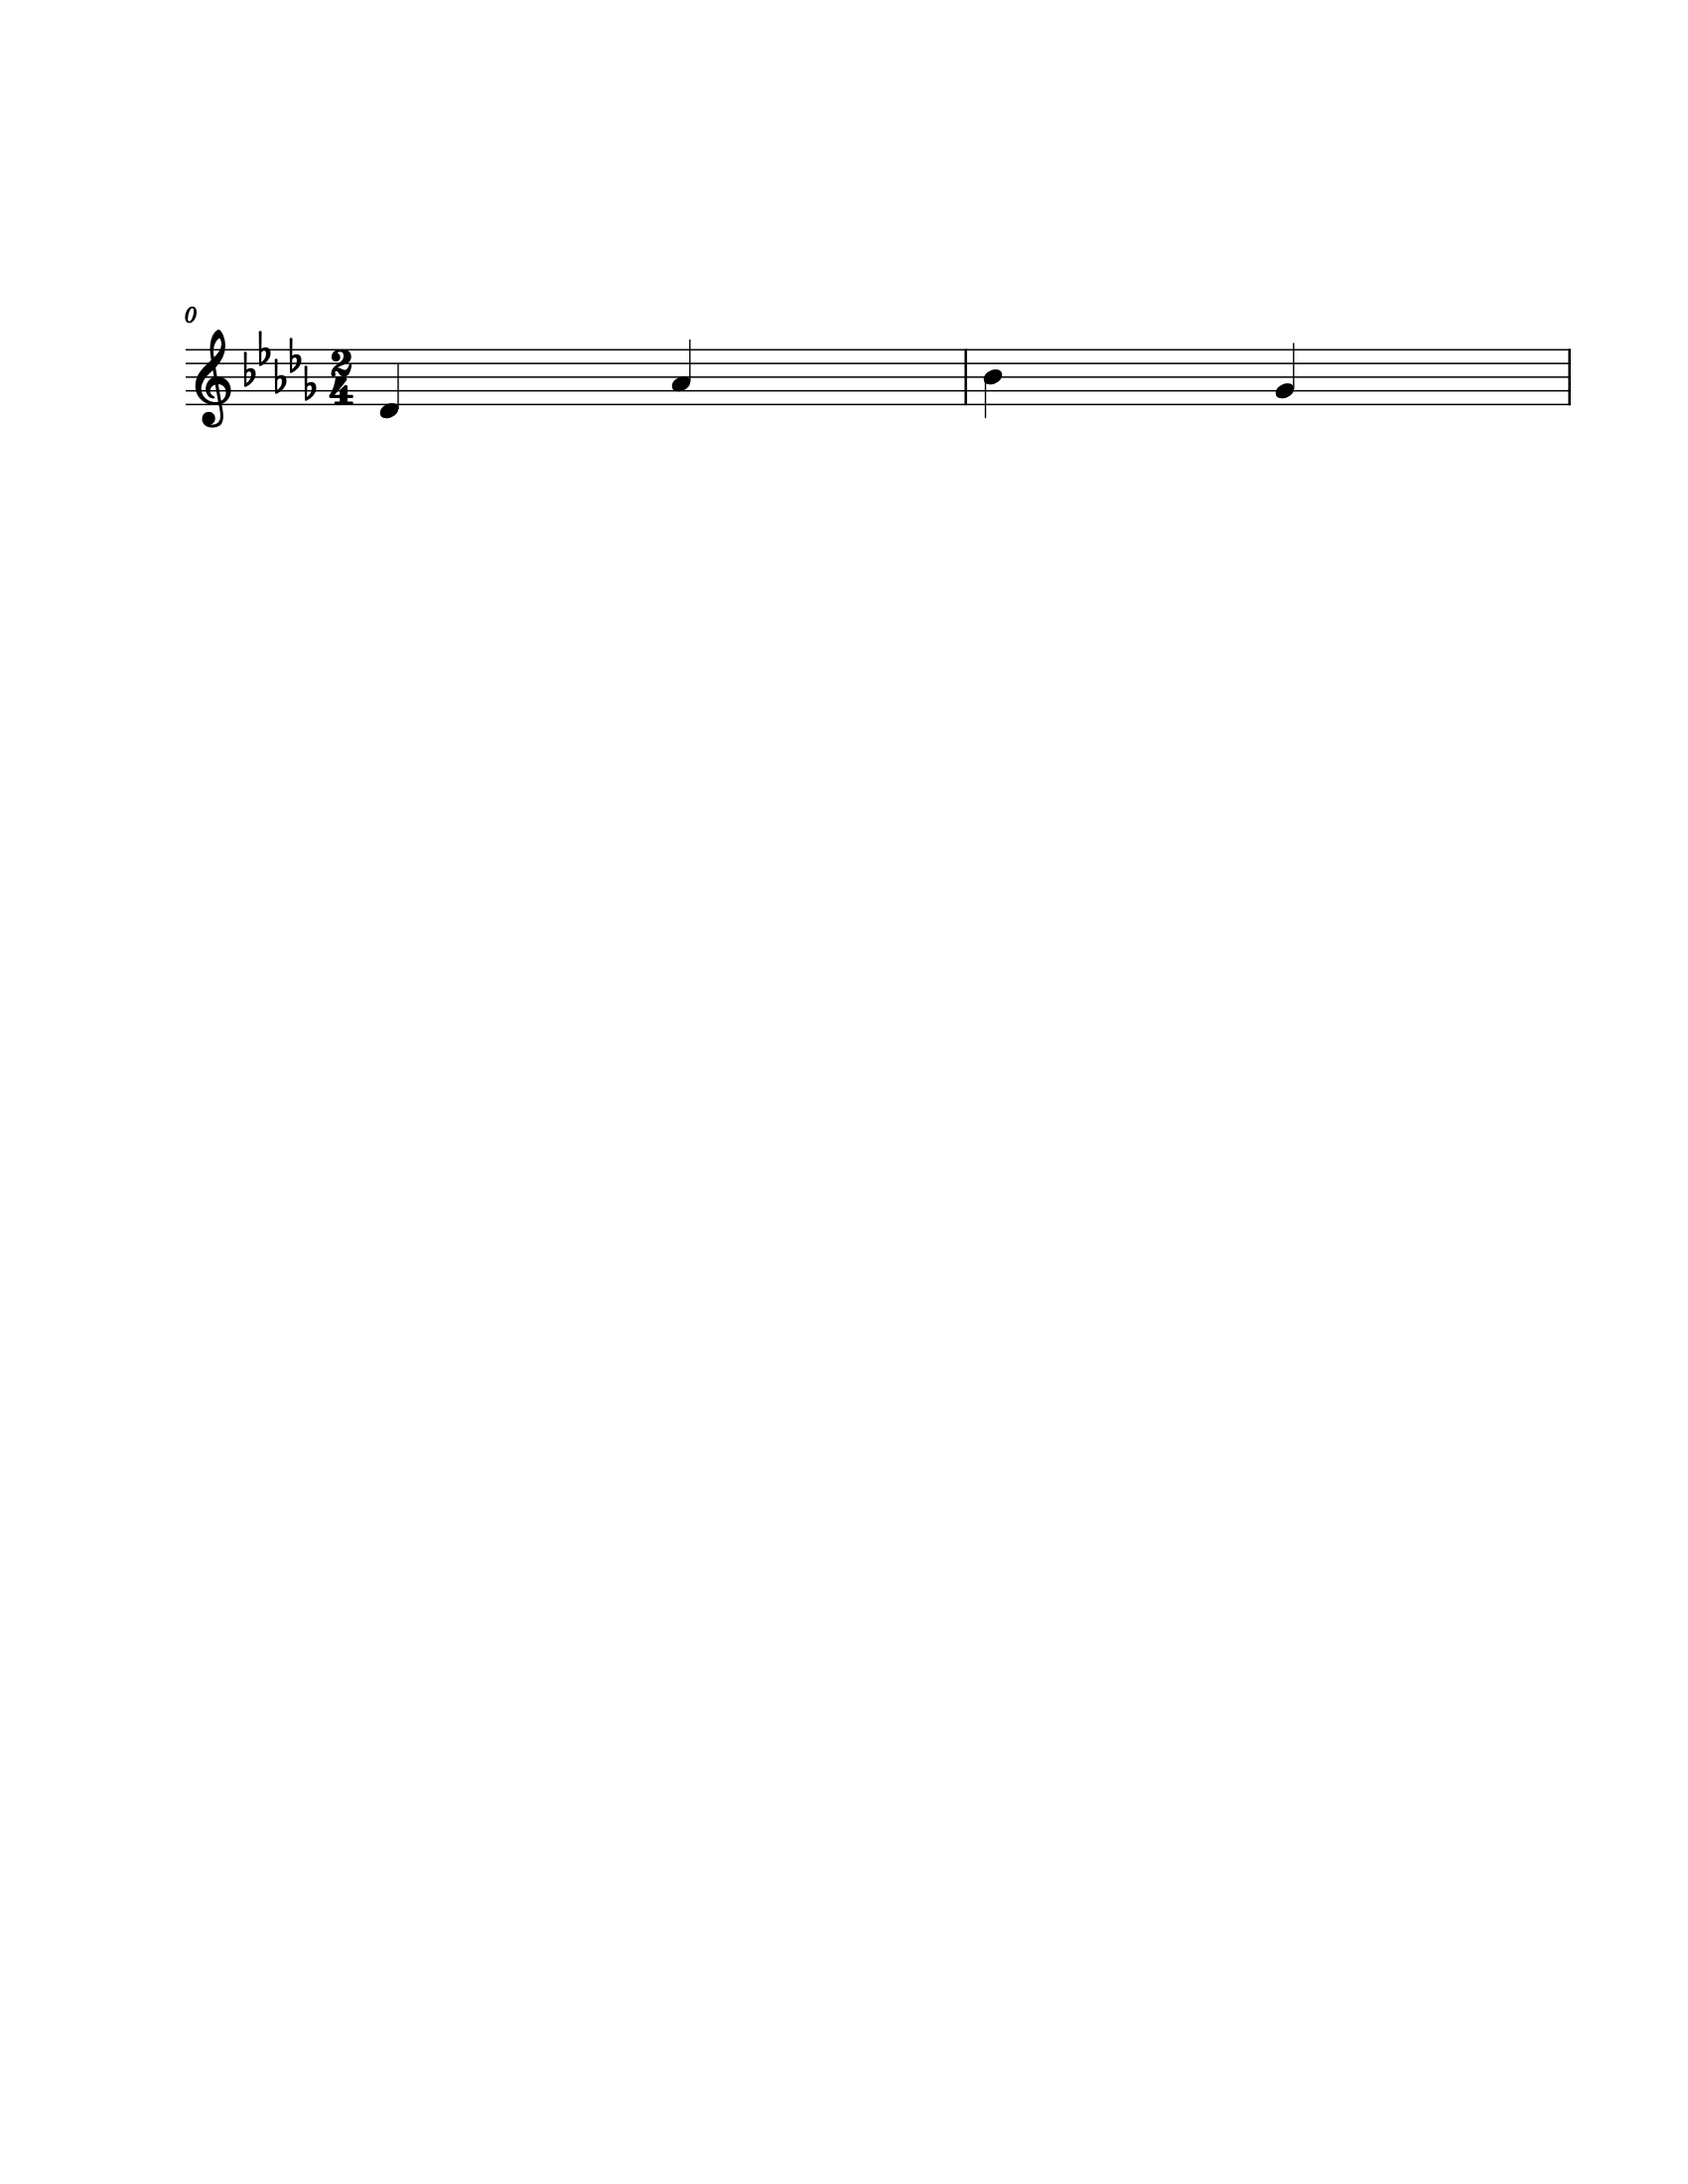

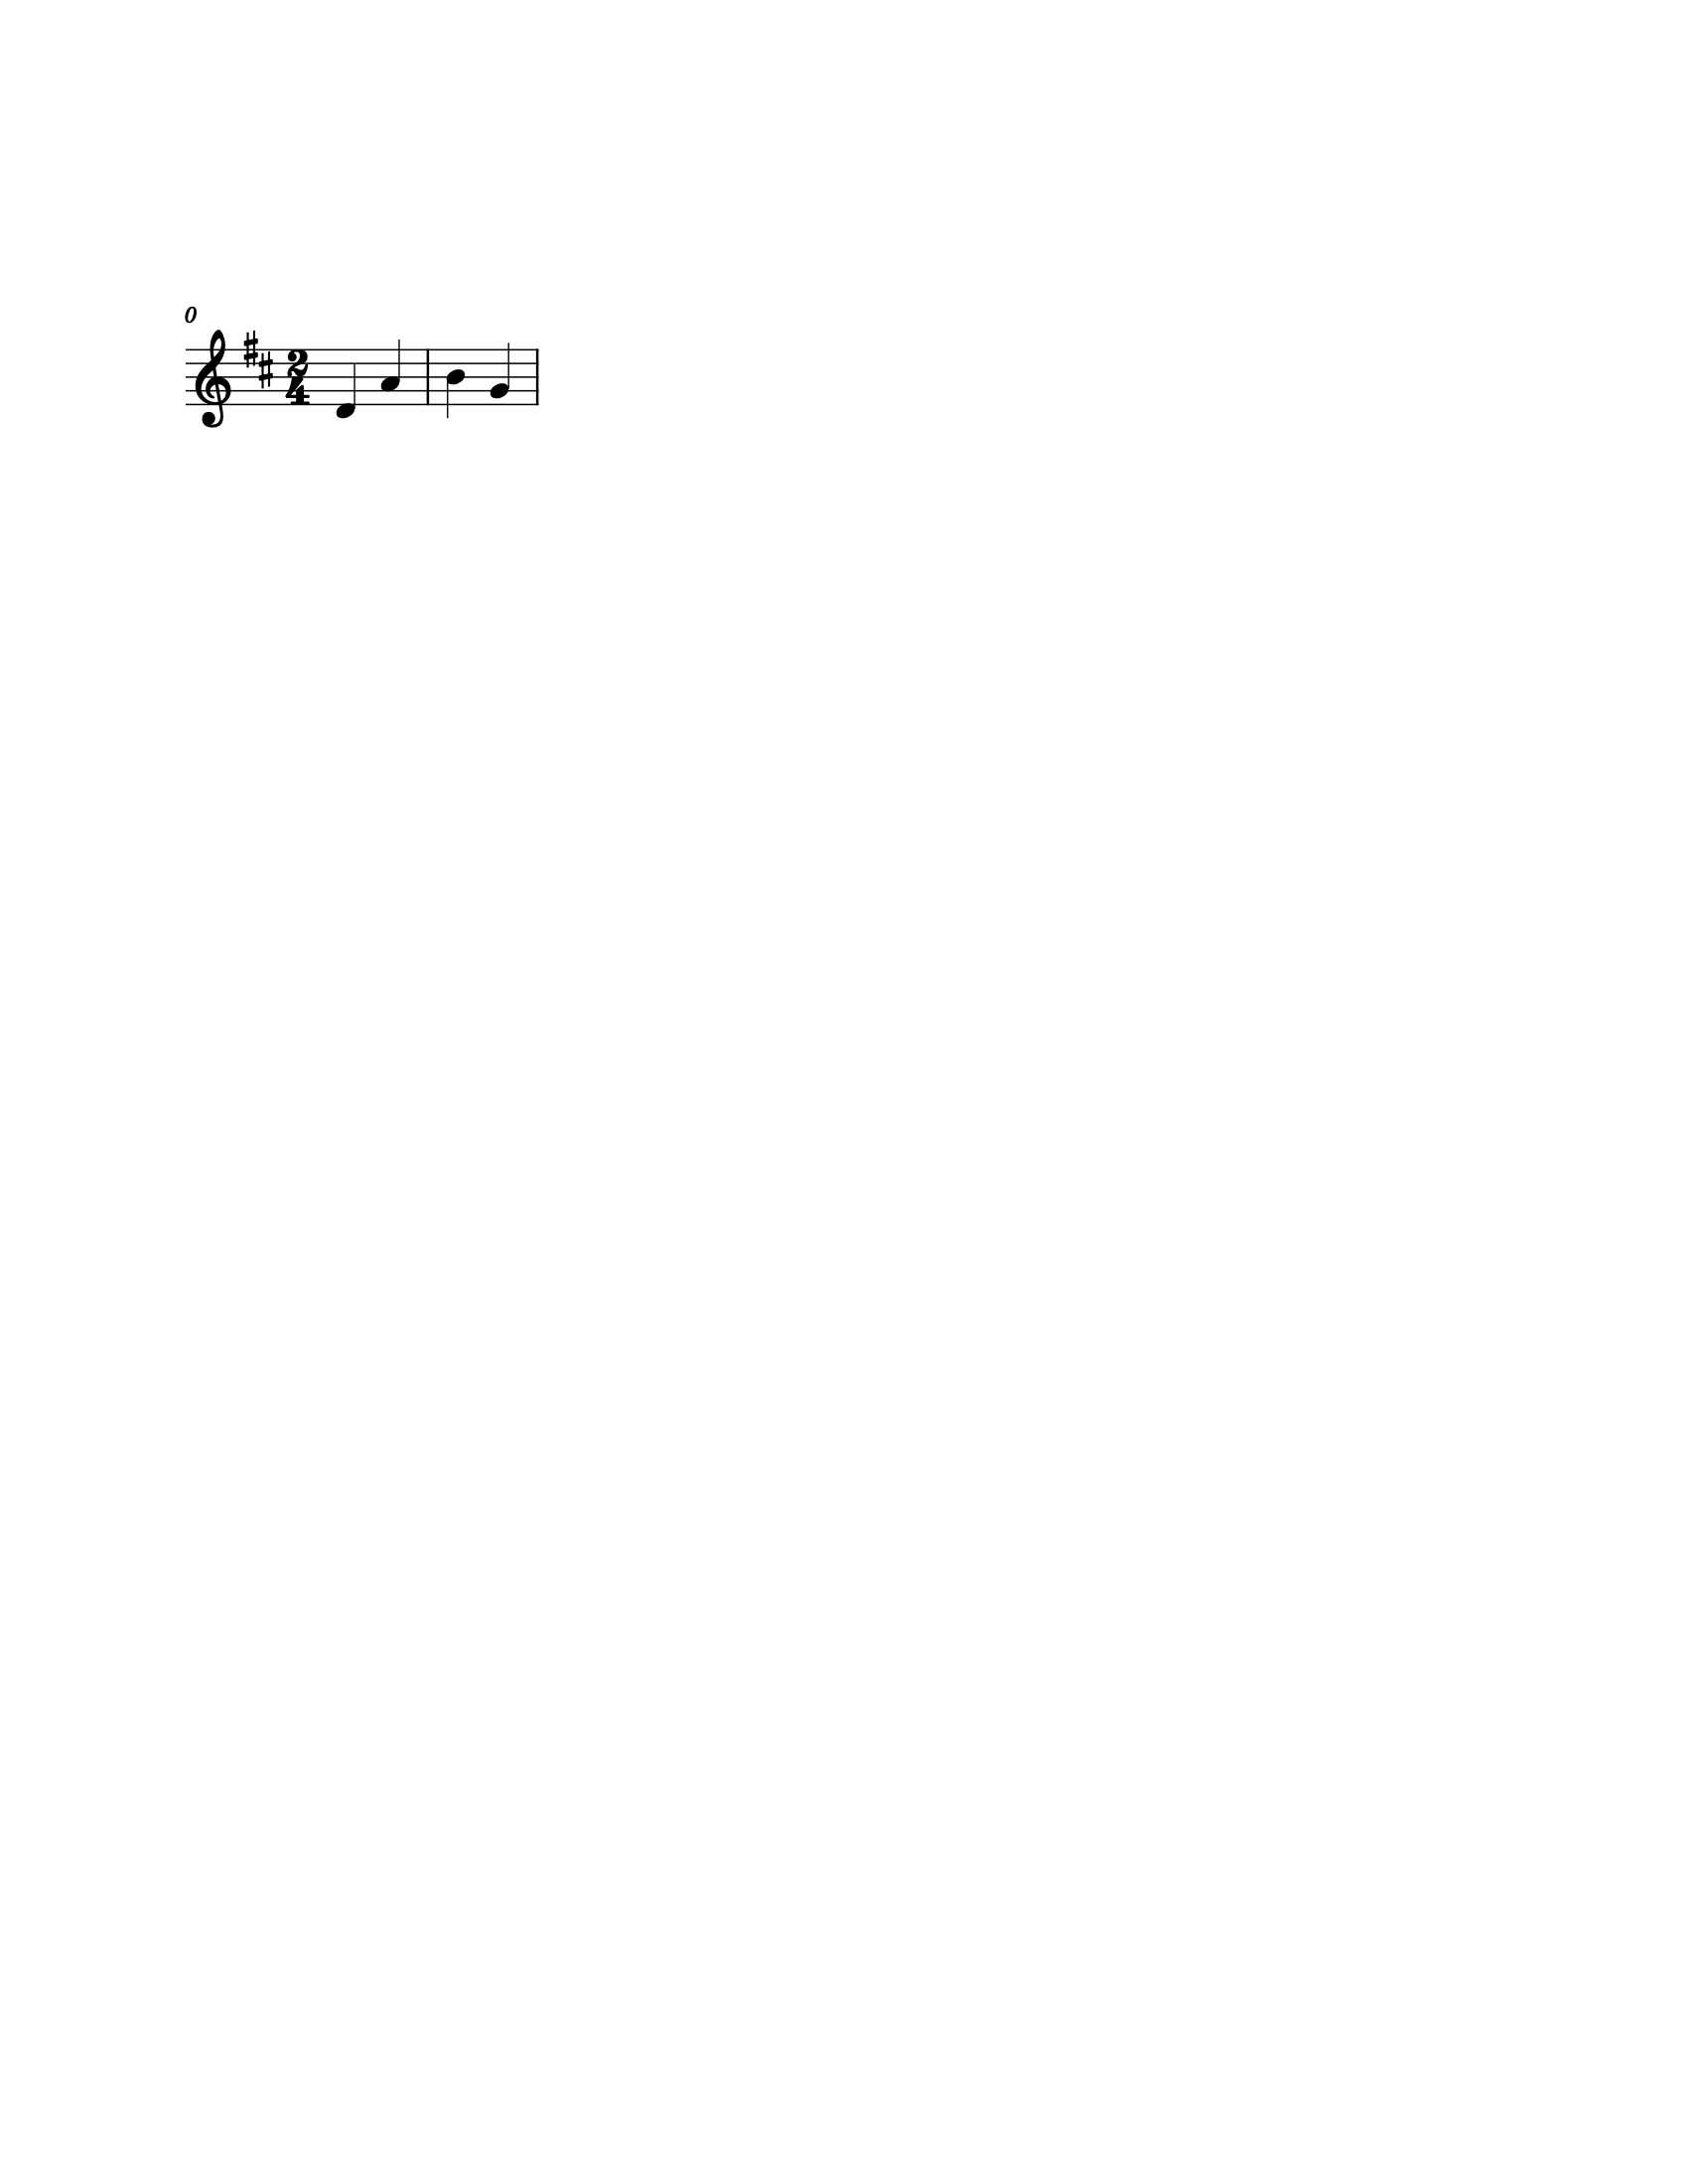

In [24]:
ks = m1.keySignature
for n in p.recurse().notes:  # we need to recurse because the notes are in measures...
    nStep = n.pitch.step
    rightAccidental = ks.accidentalByStep(nStep)
    n.pitch.accidental = rightAccidental
p.show()
p.transpose(1).show()

In [25]:
kD = key.Key('D')
kD

<music21.key.Key of D major>

In [30]:
bFlat = pitch.Pitch('B-')
kBflat = key.Key(bFlat)
print(kBflat)
kd = key.Key('D', 'minor')
print(kd)
kd.asKey('major')
amixy = key.Key('a', 'mixolydian')
print(amixy)
aDarkKey = key.Key('B--', 'locrian')
aDarkKey.alteredPitches

B- major
d minor
A mixolydian


[<music21.pitch.Pitch B->,
 <music21.pitch.Pitch E->,
 <music21.pitch.Pitch A->,
 <music21.pitch.Pitch D->,
 <music21.pitch.Pitch G->,
 <music21.pitch.Pitch C->,
 <music21.pitch.Pitch F->,
 <music21.pitch.Pitch B-->,
 <music21.pitch.Pitch E-->,
 <music21.pitch.Pitch A-->,
 <music21.pitch.Pitch D-->,
 <music21.pitch.Pitch G-->,
 <music21.pitch.Pitch C-->,
 <music21.pitch.Pitch F-->]

In [40]:
print(kd.mode, amixy.mode)
print(kd.tonic, amixy.tonic)
print(kd.relative)
print(kd.parallel)

minor mixolydian
D A
F major
D major


In [43]:
bach = corpus.parse('bwv66.6')
bach.id = 'bach66'
bach.analyze('key')
fis = bach.analyze('key')
print(fis)
print(fis.correlationCoefficient)
print(fis.tonalCertainty())
print(fis.alternateInterpretations[0:4])
print(fis.alternateInterpretations[-3:0])
# Which keyse can it be


f# minor
0.9379555412471554
1.2642604260880534
[<music21.key.Key of A major>, <music21.key.Key of b minor>, <music21.key.Key of E major>, <music21.key.Key of c# minor>]
[]


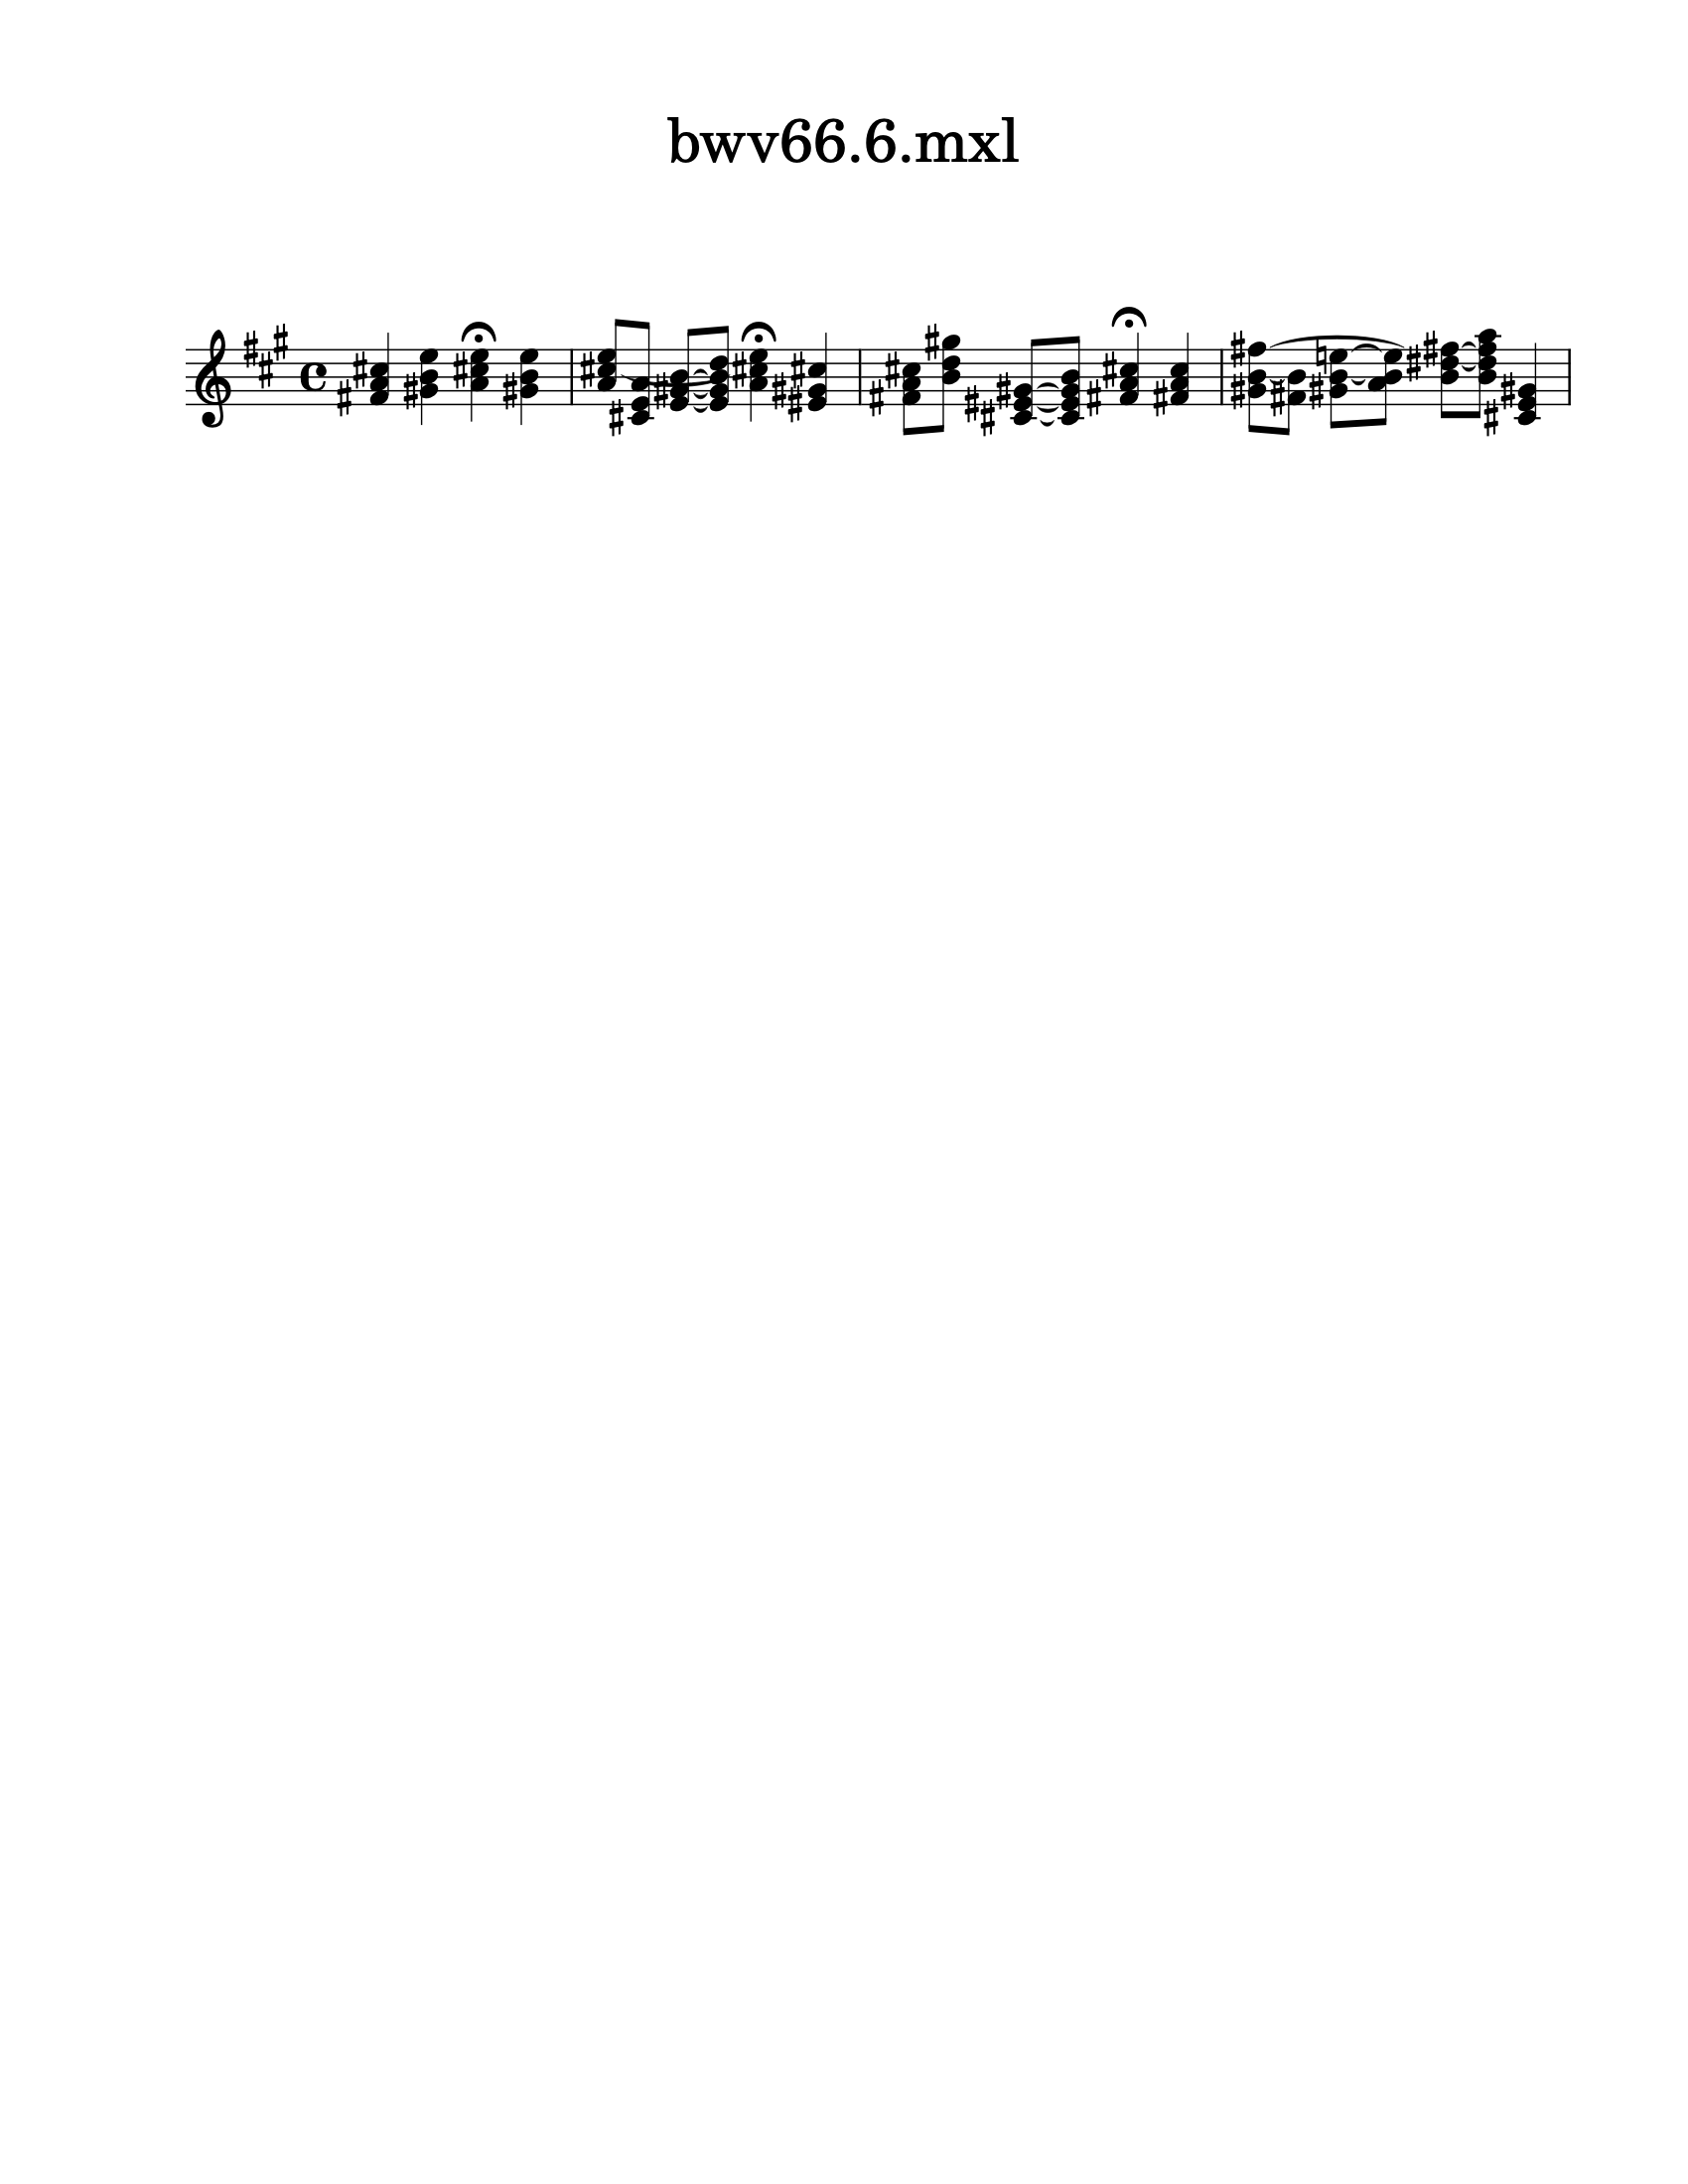

<music21.key.Key of f# minor>

In [45]:
c = bach.measures(1, 4).chordify()
for ch in c.recurse().getElementsByClass('Chord'):
    ch.closedPosition(inPlace=True, forceOctave=4)
c.show()
bach.analyze('key.krumhanslschmuckler')


In [46]:
fisNew = bach.analyze('key.krumhanslschmuckler')
fisCC = round(fis.correlationCoefficient, 3)
fisNewCC = round(fisNew.correlationCoefficient, 3)
(fisCC, fisNewCC)

(0.938, 0.815)

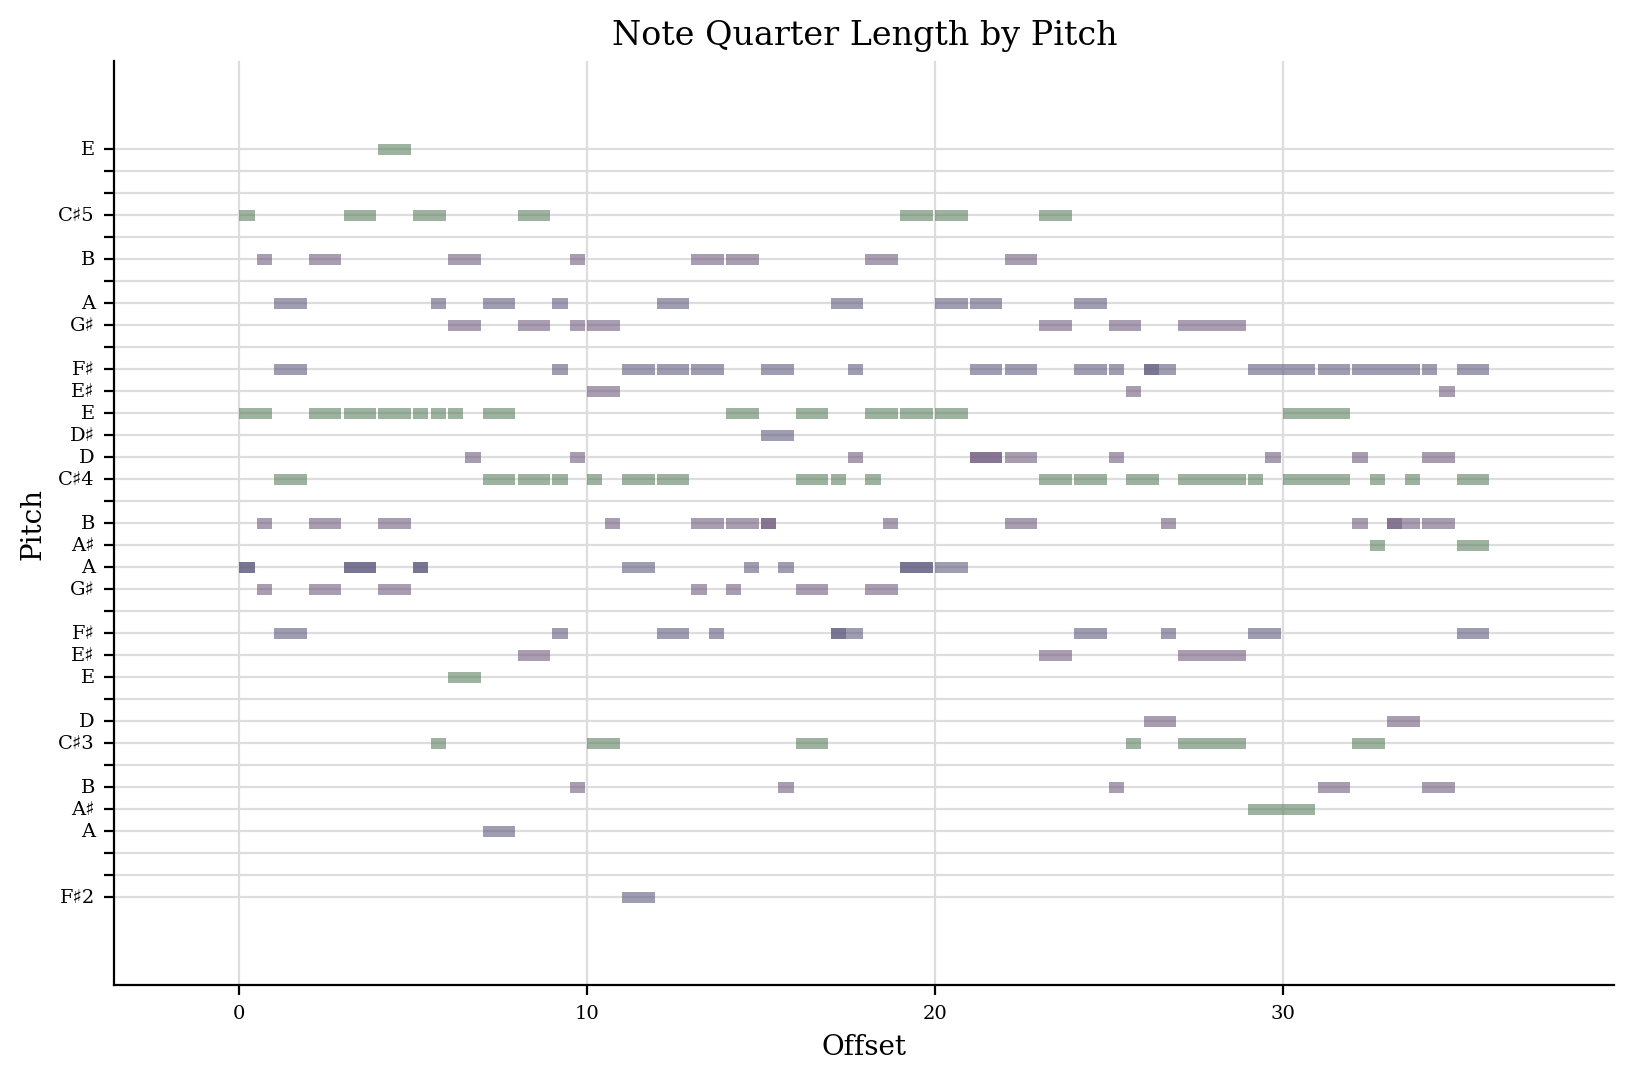

In [48]:
bach.flat.plot('pianoroll')


In [53]:
k = key.Key('E-')
print(k.classes)
print(k.solfeg('G'))
k.pitchFromDegree(2)

('Key', 'KeySignature', 'DiatonicScale', 'ConcreteScale', 'Scale', 'Music21Object', 'object')
mi


<music21.pitch.Pitch F4>